<a href="https://colab.research.google.com/github/Geracruz/projects_portfolio/blob/main/proyecto_sequia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ----------------------------------------------------------
## Remplazar estas librerias cuando se importe MLUtils
import sklearn.cluster as cluster
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ----------------------------------------------------------
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/main/Datasets/Data_Proyecto_clean.csv")
df.head()

,Entidad,Fecha,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA
0,Aguascalientes,2002-11-01,18.000000,19.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Aguascalientes,2002-12-01,14.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Aguascalientes,2003-01-01,12.743166,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Aguascalientes,2003-02-01,15.105630,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Aguascalientes,2003-03-01,16.570585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.482667


In [ ]:
df.isna().sum()

Entidad                          0
Fecha                            0
Temperatura                      0
Precipitacion                    0
D0                               0
D1                               0
D2                               0
D3                               0
D4                               0
Area_total_afectada_sequias      0
IEA                            249
dtype: int64

In [ ]:
df = df.dropna( )

In [ ]:
df.dtypes

Entidad                         object
Fecha                           object
Temperatura                    float64
Precipitacion                  float64
D0                             float64
D1                             float64
D2                             float64
D3                             float64
D4                             float64
Area_total_afectada_sequias    float64
IEA                            float64
dtype: object

In [ ]:
df['Fecha']=df['Fecha'].astype('datetime64[ns]')
df['Mes']= df['Fecha'].dt.month
df['Año']= df['Fecha'].dt.year
df=df.drop(columns='Fecha' )



In [ ]:
df.loc[:, 'Entidad'] = df['Entidad'].astype('category')
df_dummy = pd.get_dummies(df.copy(), columns=['Entidad'])


In [ ]:
df.dtypes

Entidad                        category
Temperatura                     float64
Precipitacion                   float64
D0                              float64
D1                              float64
D2                              float64
D3                              float64
D4                              float64
Area_total_afectada_sequias     float64
IEA                             float64
Mes                               int64
Año                               int64
dtype: object

**Regresión lineal múltiple con todas las variables**

In [ ]:
x=df_dummy.drop(columns="Area_total_afectada_sequias")
y=df_dummy["Area_total_afectada_sequias"]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_train,y_train_predict)))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_test,y_test_predict)))


Entrenamiento: MSE =136.00059457345753
Entrenamiento: R^2 =0.9078740069510355
Pruebas: MSE =111.40192082108014
Entrenamiento: R^2 =0.919642237166871


In [ ]:
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion
0,52.18,50.826523
1,84.59,81.162048
2,13.86,13.206039
3,40.13,39.874481
4,96.45,94.752014
5,16.46,20.884308
6,100.00,97.636719
7,50.71,53.481064
8,99.53,98.557953
9,100.00,103.597321


**Regresión polinómica múltiple**

In [ ]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_train,y_train_predict)))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_test,y_test_predict)))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =113.26780121263072
Entrenamiento: R^2 =0.923273065828031
Pruebas: MSE =107.31429423100549
Entrenamiento: R^2 =0.9225907727545397


,valor_real,prediccion,diferencia
0,52.18,51.333804,0.846196
1,84.59,87.211773,-2.621773
2,13.86,10.813398,3.046602
3,40.13,41.075004,-0.945004
4,96.45,91.893514,4.556486
5,16.46,24.214744,-7.754744
6,100.00,95.646718,4.353282
7,50.71,49.435004,1.274996
8,99.53,98.015442,1.514558
9,100.00,89.515331,10.484669


Predecir unico

In [ ]:
datos = {
    'Entidad' : [1, 3, 5],
    'Temperatura': [21.2, 22, 17],
    'Precipitacion': [25.20, 12.3,0]
}

prediccion = pd.DataFrame(datos)
print(prediccion)

   Entidad  Temperatura  Precipitacion
0        1         21.2           25.2
1        3         22.0           12.3
2        5         17.0            0.0


In [ ]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=3)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_train,y_train_predict)))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_test,y_test_predict)))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

KeyboardInterrupt: ignored

**No usar**

**Árbol de decisión regresor**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
arbol=regressor.fit(X_train, Y_train)
#cross_val_score(regressor, x, y, cv=10)


y_train_predict = arbol.predict(X_train)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_train,y_train_predict)))

y_test_predict = arbol.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_test,y_test_predict)))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

KeyboardInterrupt: ignored

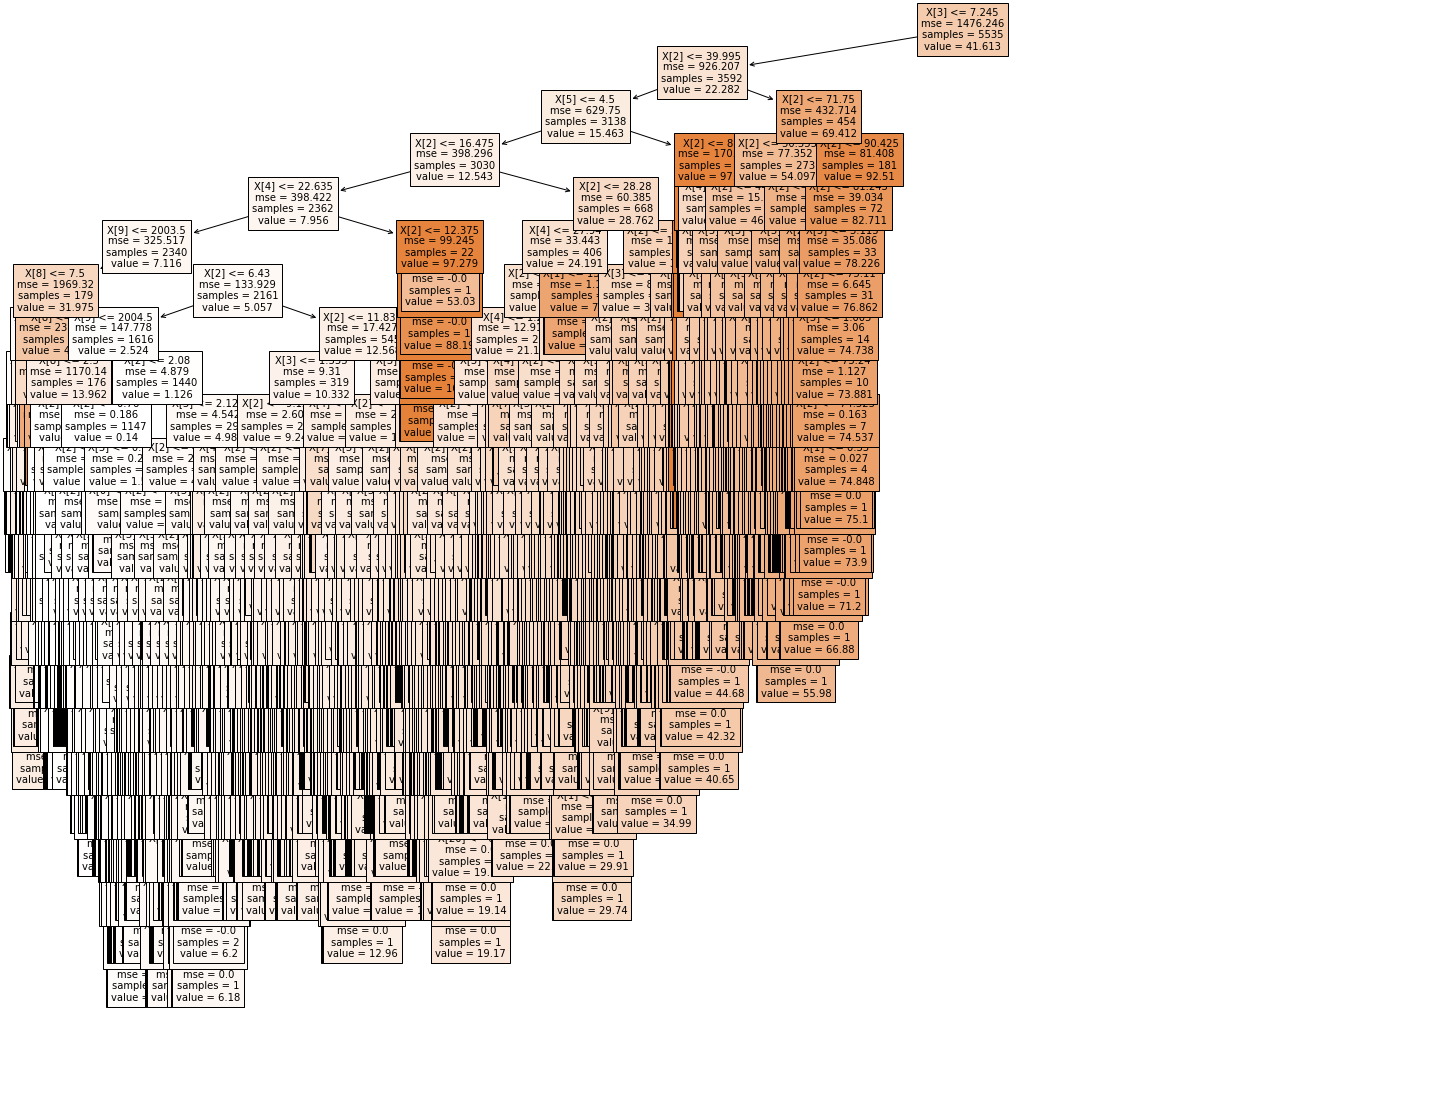

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(arbol, filled=True)

**Random forest regresor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor as forest

bosque = forest(n_estimators = 1000, random_state = 0)
bosque.fit(X_train, Y_train)

y_train_predict = bosque.predict(X_train)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_train,y_train_predict)))

y_test_predict = bosque.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_test,y_test_predict)))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =1.0437016590008241
Entrenamiento: R^2 =0.9992930027101435
Pruebas: MSE =6.718194012380242
Entrenamiento: R^2 =0.995153952129956


,valor_real,prediccion,diferencia
0,52.18,54.12575,-1.94575
1,84.59,82.64958,1.94042
2,13.86,13.99326,-0.13326
3,40.13,39.48179,0.64821
4,96.45,92.13794,4.31206
5,16.46,17.01442,-0.55442
6,100.00,97.96924,2.03076
7,50.71,51.96352,-1.25352
8,99.53,98.85742,0.67258
9,100.00,97.76342,2.23658


In [ ]:
df_predicciones=df_dummy.loc[(df_dummy['Año']==2021) & (df_dummy['Mes']==6)]
y_val=df_predicciones['Area_total_afectada_sequias']
x_val=df_predicciones.drop(columns='Area_total_afectada_sequias')

y_val_predict= bosque.predict(x_val)

In [ ]:
df_resultados=df.loc[(df_dummy['Año']==2021) & (df_dummy['Mes']==6)]
df_resultados['Prediccion']=y_val_predict
df_resultados['Diferencia']=df_resultados['Area_total_afectada_sequias']-df_resultados['Prediccion']
df_resultados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Entidad,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA,Mes,Año,Prediccion,Diferencia
223,Aguascalientes,19.8,124.1,37.64,3.54,0.00,0.00,0.00,41.18,5.195000,6,2021,41.09380,0.08620
447,Baja California,24.4,0.2,0.43,48.43,51.14,0.00,0.00,100.00,58.889000,6,2021,99.74775,0.25225
895,Campeche,29.2,196.8,0.00,0.00,0.00,0.00,0.00,0.00,1.537000,6,2021,0.00000,0.00000
1119,Chiapas,26.0,319.2,0.00,0.00,0.00,0.00,0.00,0.00,0.149000,6,2021,0.00000,0.00000
1343,Chihuahua,26.5,61.6,26.06,28.40,22.55,14.09,1.51,92.60,20.300333,6,2021,91.75116,0.84884


In [ ]:
df_resultados['Entidad'].unique()

['Aguascalientes', 'Baja California', 'Campeche', 'Chiapas', 'Chihuahua', ..., 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas']
Length: 31
Categories (31, object): ['Aguascalientes', 'Baja California', 'Campeche', 'Chiapas', ..., 'Tlaxcala',
                          'Veracruz', 'Yucatan', 'Zacatecas']

In [ ]:
nombres_nuevos = {
    "Yucatan": "Yucatán",
    "San Luis Potosi":"San Luis Potosí",
    "Queretaro":"Querétaro",
    "Nuevo Leon":"Nuevo León",
    "Michoacan":"Michoacán",
    "Ciudad De Mexico":"Ciudad de México",
    "Estado De Mexico":"México"
}
df_resultados['Entidad']=df_resultados['Entidad'].replace(nombres_nuevos)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_resultados.head()

,Entidad,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA,Mes,Año,Prediccion,Diferencia
223,Aguascalientes,19.8,124.1,37.64,3.54,0.00,0.00,0.00,41.18,5.195000,6,2021,41.09380,0.08620
447,Baja California,24.4,0.2,0.43,48.43,51.14,0.00,0.00,100.00,58.889000,6,2021,99.74775,0.25225
895,Campeche,29.2,196.8,0.00,0.00,0.00,0.00,0.00,0.00,1.537000,6,2021,0.00000,0.00000
1119,Chiapas,26.0,319.2,0.00,0.00,0.00,0.00,0.00,0.00,0.149000,6,2021,0.00000,0.00000
1343,Chihuahua,26.5,61.6,26.06,28.40,22.55,14.09,1.51,92.60,20.300333,6,2021,91.75116,0.84884


In [ ]:
from urllib.request import urlopen
import json
with urlopen("https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json"
) as response:
    estados_mexico = json.load(response)



In [ ]:
pip install plotly_express==0.4.1

In [ ]:
pip install plotly==5.3.1

     |████████████████████████████████| 23.9 MB 12 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(go.Choroplethmapbox(name='Mexico', geojson=estados_mexico, ids=df_resultados['Entidad'], z=df_resultados['Prediccion'],
                                locations=df_resultados['Entidad'], featureidkey='properties.name', colorscale='reds', 
                                colorbar_title = "Predicción Junio 2021",
                                text=df_resultados['Diferencia'], hoverinfo=["all"]))

fig.update_layout(mapbox_style='open-street-map',
                  mapbox_zoom=4, 
                  mapbox_center = {'lat': 25, 'lon': -99},
                  title_text = '2016 Presidential Election'
                  
              
                 )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#Valor superior es valor predicho y el de abajo diferencia en la prediccion

223  Entidad_Aguascalientes         1
     Entidad_Baja California        0
     Entidad_Baja California Sur    0
     Entidad_Campeche               0
     Entidad_Chiapas                0
dtype: uint8

**Redes neuronales**

In [ ]:
# Definamos nuestra red neuronal con Keras

red_neuronal = Sequential()
red_neuronal.add(Dense(43, input_dim=42, activation="relu"))
red_neuronal.add(Dense(230000, activation="relu"))
red_neuronal.add(Dense(1, activation="sigmoid"))

In [ ]:
red_neuronal.compile(loss="binary_crossentropy", optimizer="adam", metrics=["mse"])

In [ ]:
red_neuronal.fit(X_train,Y_train, epochs=100, batch_size= 2300)


Epoch 1/100
3/3 [==============================] - 14s 3s/step - loss: -58918.9453 - mse: 3140.2295
Epoch 2/100
3/3 [==============================] - 12s 3s/step - loss: -381699.2500 - mse: 3125.6619
Epoch 3/100
3/3 [==============================] - 12s 3s/step - loss: -966124.7500 - mse: 3125.6621
Epoch 4/100
3/3 [==============================] - 12s 4s/step - loss: -1872945.6250 - mse: 3125.6619
Epoch 5/100
3/3 [==============================] - 12s 3s/step - loss: -3159654.5000 - mse: 3125.6621
Epoch 6/100
3/3 [==============================] - 12s 3s/step - loss: -4883508.5000 - mse: 3125.6621
Epoch 7/100
3/3 [==============================] - 12s 3s/step - loss: -7128351.5000 - mse: 3125.6619
Epoch 8/100
3/3 [==============================] - 12s 3s/step - loss: -9927684.0000 - mse: 3125.6619
Epoch 9/100
3/3 [==============================] - 12s 3s/step - loss: -13418505.0000 - mse: 3125.6621
Epoch 10/100
3/3 [==============================] - 12s 3s/step - loss: -17625378.000

In [ ]:
y_train_predict = red_neuronal.predict(X_train)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = red_neuronal.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))



Entrenamiento: MSE =3125.6619118157187
Pruebas: MSE =3025.2296667630058


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

**MSV**

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, Y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
y_train_predict = regr.predict(X_train)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = regr.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =152.09485813640504
Pruebas: MSE =128.7316689615057


,valor_real,prediccion,diferencia
0,52.18,51.033095,1.146905
1,84.59,81.443054,3.146946
2,13.86,16.137309,-2.277309
3,40.13,37.273578,2.856422
4,96.45,92.219814,4.230186
5,16.46,18.930825,-2.470825
6,100.00,85.458750,14.541250
7,50.71,49.853820,0.856180
8,99.53,96.555962,2.974038
9,100.00,89.109605,10.890395
